# Data Clearning
異常値が多いんで，改善します．

# import

In [179]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

In [180]:
!cd /home/masa1357/git/Credit-Score-Classification-Starter
train_df = pd.read_csv('./data/input/train.csv', index_col=0, low_memory=False)
test_df = pd.read_csv('./data/input/test.csv', index_col=0, low_memory=False)

�w�肳�ꂽ�p�X��������܂���B


In [181]:
#df = pd.concat([train_df.drop(['Poor_Credit_Score'], axis=1), test_df])
df = train_df

<h1>データの可視化</h1>
データを可視化して，どんな感じなのか考える．

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 1 to 70000
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               70000 non-null  object 
 1   Month                     70000 non-null  object 
 2   Name                      63005 non-null  object 
 3   Age                       70000 non-null  int64  
 4   SSN                       70000 non-null  object 
 5   Occupation                64999 non-null  object 
 6   Annual_Income             70000 non-null  float64
 7   Monthly_Inhand_Salary     59417 non-null  float64
 8   Num_Bank_Accounts         70000 non-null  int64  
 9   Num_Credit_Card           70000 non-null  int64  
 10  Interest_Rate             70000 non-null  int64  
 11  Num_of_Loan               70000 non-null  int64  
 12  Type_of_Loan              61808 non-null  object 
 13  Delay_from_due_date       70000 non-null  int64  
 14  Num_of_Dela

<h3>考察</h3>

<p>結果として出力するもの:</p>
<ul>
  <li><strong>Monthly_Balance</strong>: 顧客の月次残高を表します（米ドル）</li>
</ul>

<p>データとして重要そうなもの:</p>
<ul>
  <li><strong>Age</strong></li>
  <li><strong>Occupation</strong>: 職業</li>
  <li><strong>Annual_Income</strong>: 年収</li>
  <li><strong>Monthly_Inhand_Salary</strong>: 基本給(月)</li>
  <li><strong>Num_Bank_Accounts</strong>: 個人が保有する銀行口座の数を表します</li>
  <li><strong>Num_Credit_Card</strong>: 個人が所有する他のクレジットカードの数を表します</li>
  <li><strong>Interest_Rate</strong>: クレジットカードの金利を表します</li>
  <li><strong>Num_of_Loan</strong>: 銀行からの融資の数を表します</li>
  <li><strong>Type_of_Loan</strong>: 個人が借りたローンの種類を表します</li>
  <li><strong>Delay_from_due_date</strong>: 支払日からの平均遅延日数を表します</li>
  <li><strong>Num_of_Delayed_Payment</strong>: 一人当たりの支払い遅延の平均回数を表します</li>
  <li><strong>Changed_Credit_Limit</strong>: クレジットカードの限度額の変化率を表します</li>
  <li><strong>Credit_Mix</strong>: クレジットの組み合わせの分類を表します</li>
  <li><strong>Outstanding_Debt</strong>: 支払われるべき残りの負債を表します（米ドル）</li>
  <li><strong>Credit_Utilization_Ratio</strong>: クレジットカードの利用率を表します</li>
  <li><strong>Credit_History_Age</strong>: 個人の信用履歴の年齢を表します</li>
  <li><strong>Payment_of_Min_Amount</strong>: その人が最低金額のみを支払ったかどうかを表します</li>
  <li><strong>Total_EMI_per_month</strong>: 毎月のEMI支払いを表します (米ドル)</li>
  <li><strong>Amount_invested_monthly</strong>: 顧客による毎月の投資額を表します (米ドル)</li>
  <li><strong>Payment_Behaviour</strong>: 顧客の支払い行動を表します (米ドル)</li>
  <li><strong>Monthly

# ヒストグラム

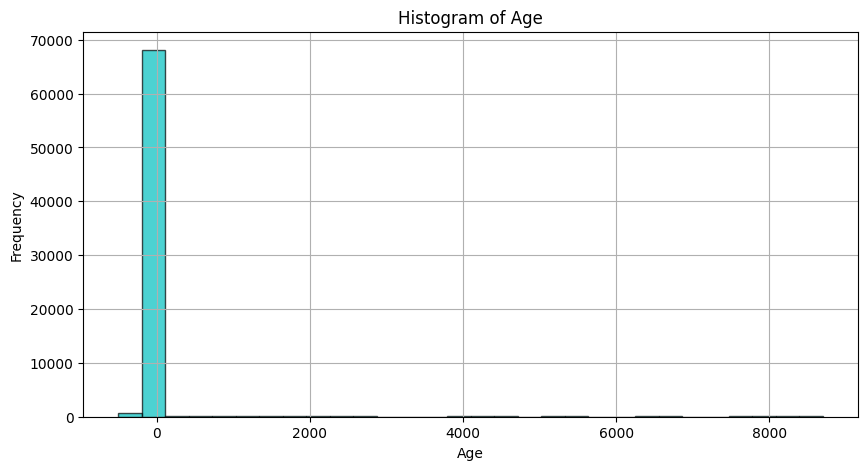

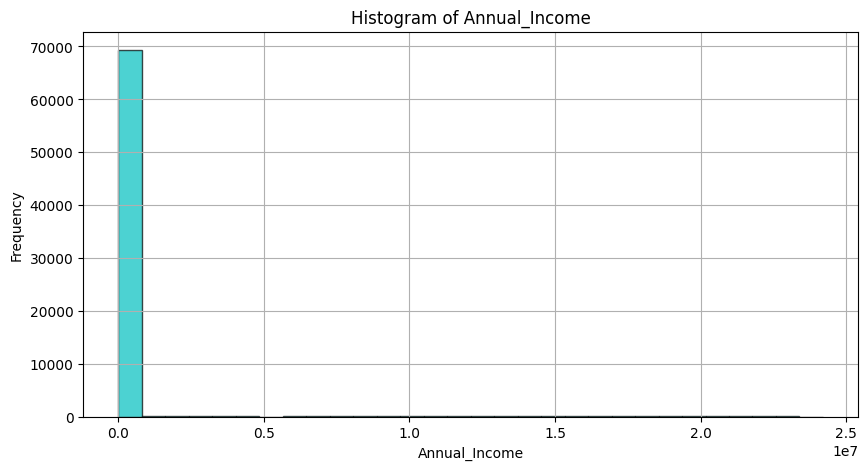

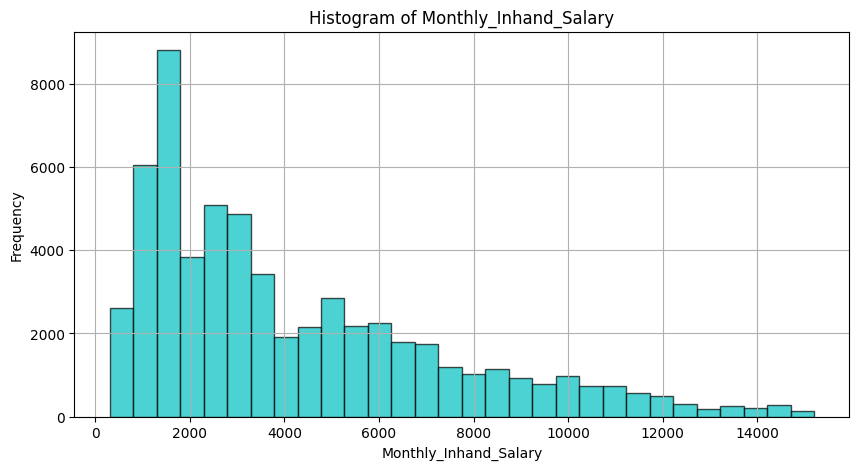

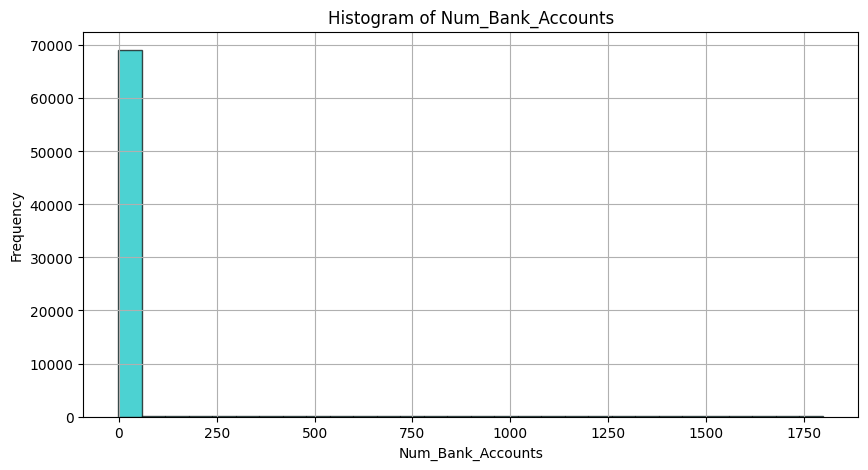

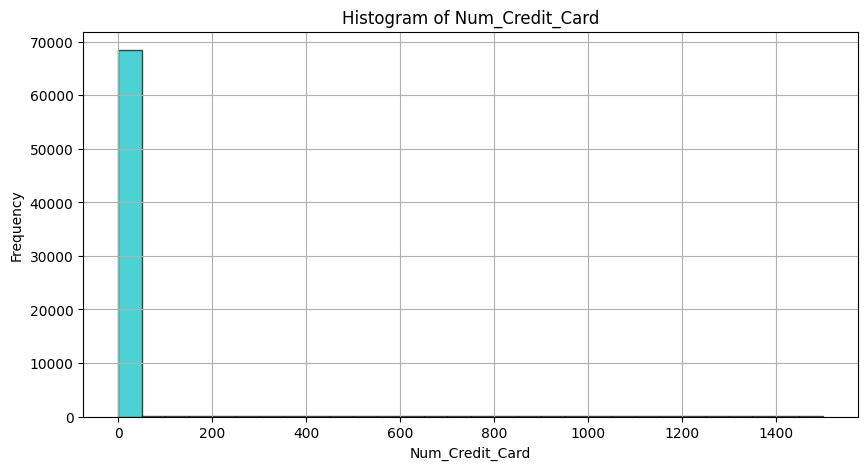

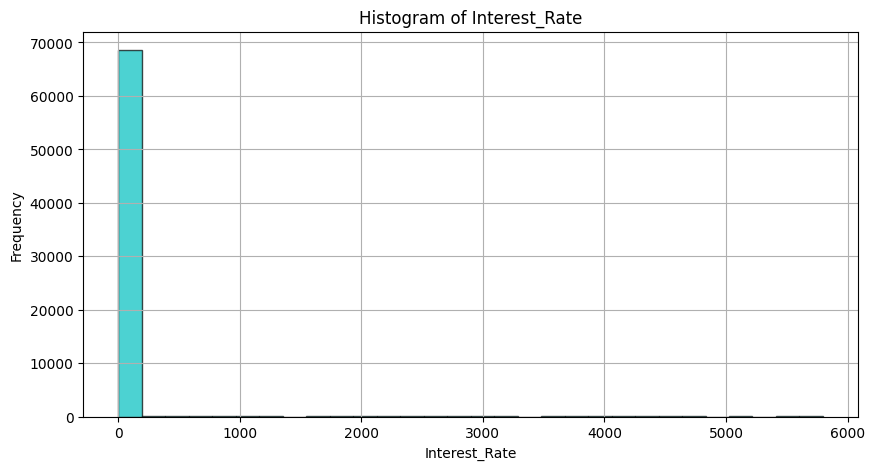

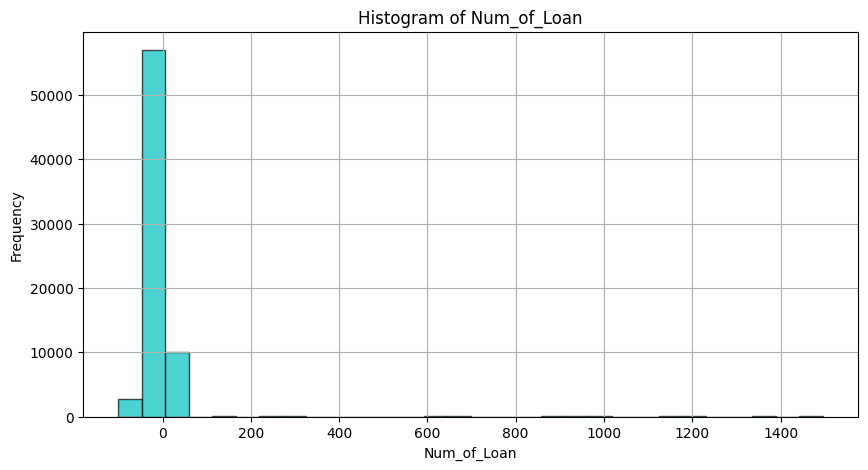

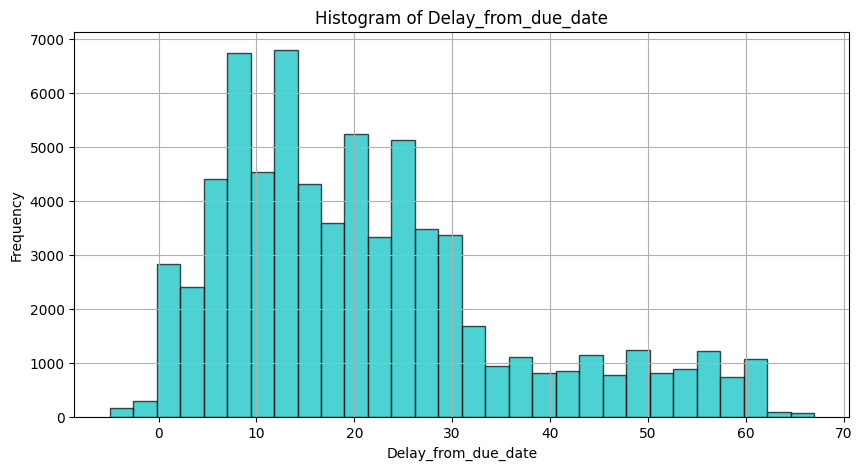

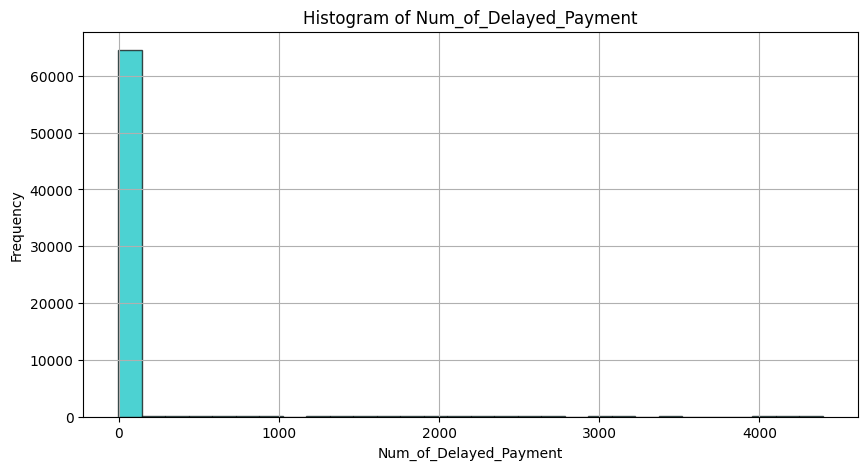

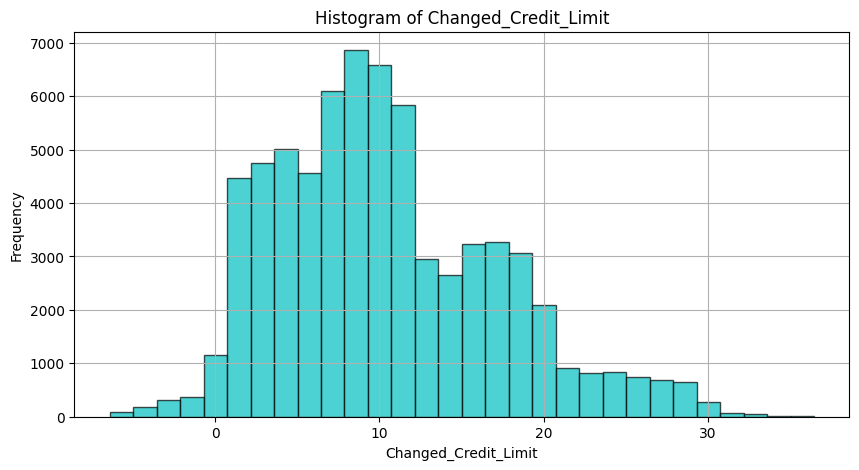

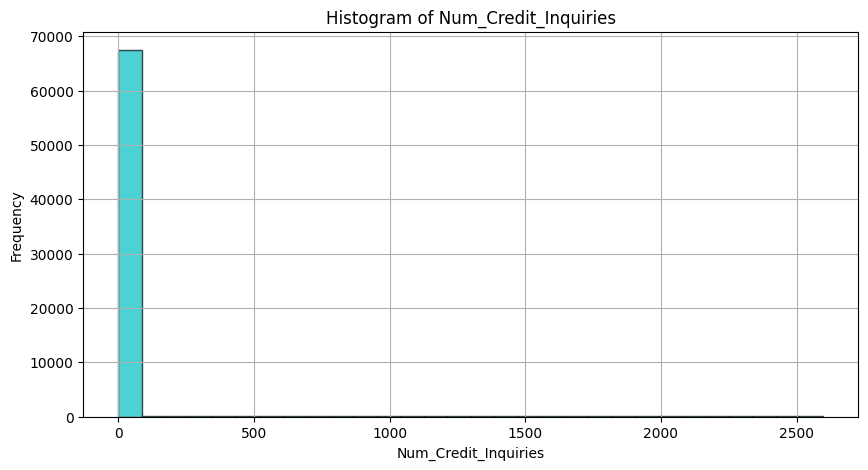

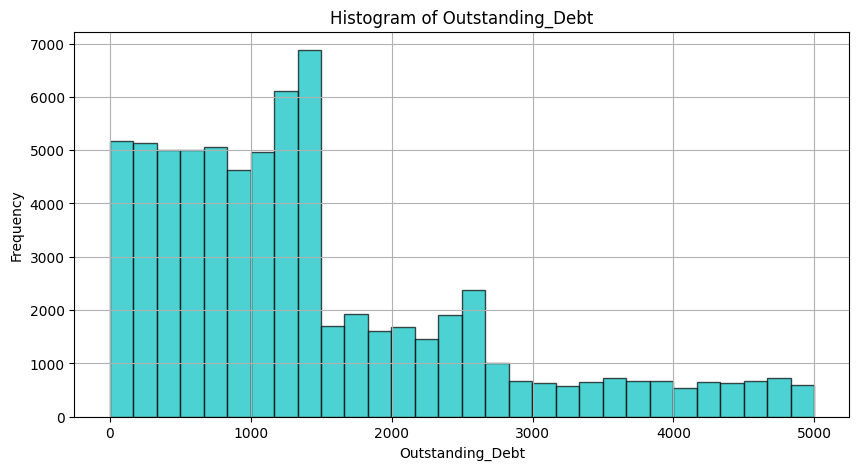

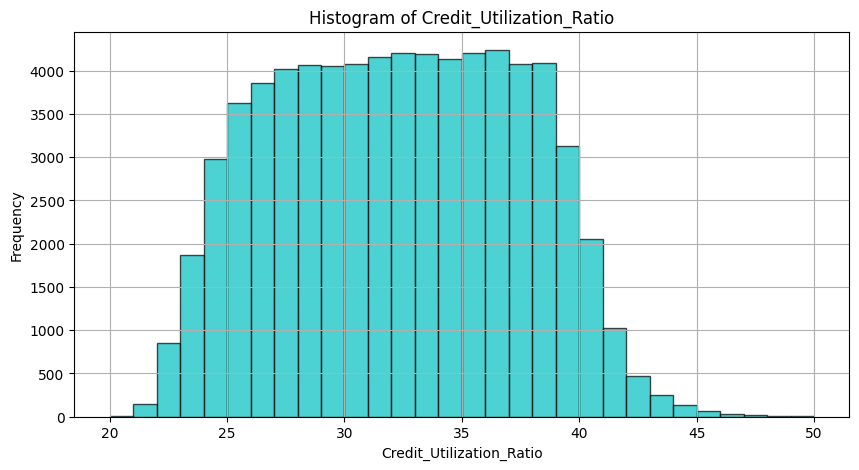

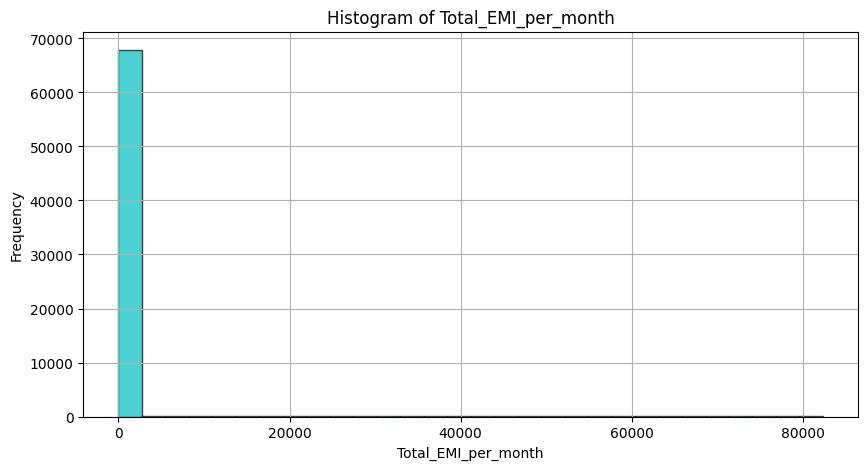

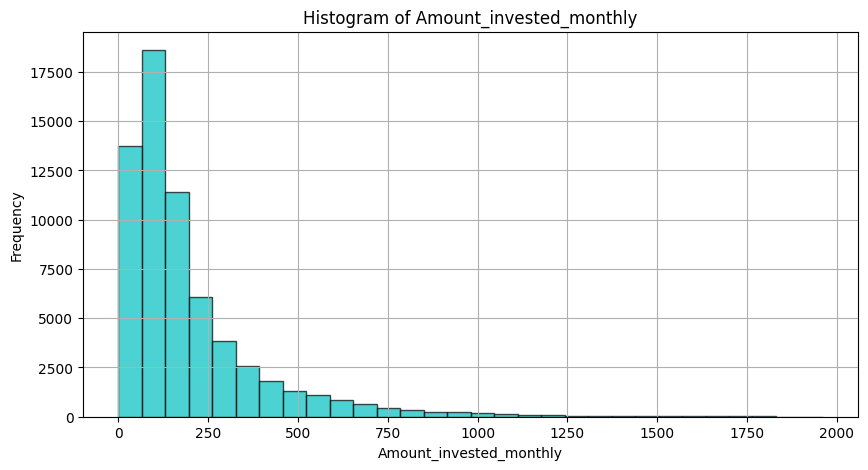

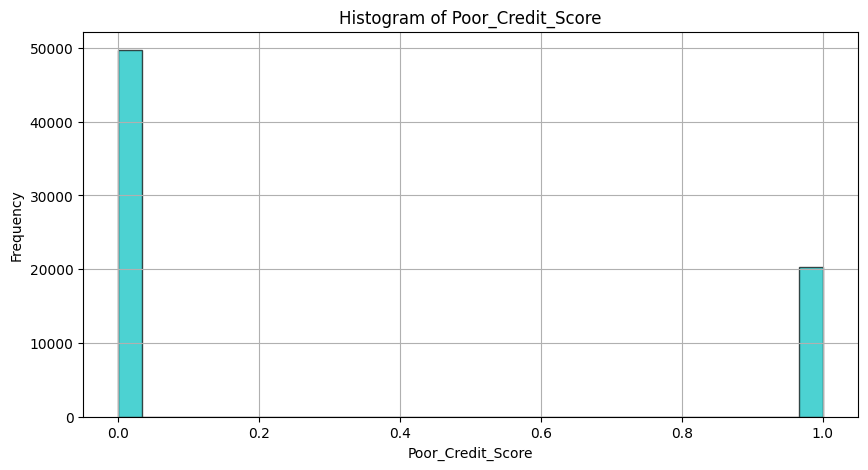

In [183]:
df_numeric = df.select_dtypes(include=[np.number])

for column in df_numeric.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df_numeric[column], bins=30, color='c', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

<h3>考察</h3>
<p>異常値がある列:</p>
<ul>
  <li><strong>Age</strong></li>
  <li><strong>Annual_Income</strong>: 年収</li>
  <li><strong>Num_Bank_Accounts</strong>: 個人が保有する銀行口座の数を表します</li>
  <li><strong>Num_Credit_Card</strong>: 個人が所有する他のクレジットカードの数を表します</li>
  <li><strong>Interest_Rate</strong>: クレジットカードの金利を表します</li>
  <li><strong>Num_of_Loan</strong>: 銀行からの融資の数を表します</li>
  <li><strong>Num_of_Delayed_Payment</strong>: 一人当たりの支払い遅延の平均回数を表します</li>
  <li><strong>Num_Credit_Inquiries</strong>: その人が最低金額のみを支払ったかどうかを表します</li>
  <li><strong>Total_EMI_per_month</strong>: 毎月のEMI支払いを表します (米ドル)</li>
  <li><strong>Monthly
</ul>
  
<p>巨大値が多い傾向にある</p>
<p>Ageは絶対値化して，マイナスを消したいかな</p>


# 異常値のある列を抽出

In [184]:
# 異常値がある列のリスト
columns_with_outliers = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                         'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
                         'Num_Credit_Inquiries', 'Total_EMI_per_month']

# 新しいデータフレームを作成
df_new = df[columns_with_outliers]
df_new


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Total_EMI_per_month
ID,,,,,,,,,
1,27,56714.52,7,10,29,4,19.0,12.0,165.335553
2,28,56714.52,7,10,29,4,19.0,13.0,165.335553
3,28,56714.52,7,10,29,4,21.0,13.0,165.335553
4,28,56714.52,7,10,29,4,19.0,13.0,165.335553
5,28,56714.52,703,10,29,4,20.0,13.0,165.335553
...,...,...,...,...,...,...,...,...,...
69996,38,82583.61,6,4,10,3,16.0,5.0,50164.000000
69997,38,82583.61,6,4,10,3,16.0,5.0,172.813771
69998,38,82583.61,6,4,10,3,13.0,5.0,172.813771


In [185]:
df.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Poor_Credit_Score
count,70000.000000,7.000000e+04,59417.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,65073.000000,68536.000000,68594.000000,70000.000000,70000.000000,70000.000000,63828.000000,70000.000000
mean,107.802743,1.712009e+05,4183.152214,16.945814,22.483686,73.245414,3.083700,21.036871,30.770811,10.348898,27.531052,1424.889849,32.285879,1392.028040,195.096976,0.289229
std,673.686669,1.403718e+06,3177.968850,116.095635,129.009383,468.025509,63.499418,14.884278,223.878162,6.770178,192.753148,1157.945113,5.121765,8274.276025,198.835822,0.453407
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.440000,0.000000,0.340000,20.000000,0.000000,0.000000,0.000000
25%,24.000000,1.950672e+04,1625.793333,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.290000,3.000000,568.670000,28.039075,29.916254,72.221620,0.000000
50%,33.000000,3.742188e+04,3084.106667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1167.140000,32.308398,68.548445,128.899706,0.000000
75%,42.000000,7.230732e+04,5920.405000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.780000,9.000000,1936.790000,36.503088,157.820491,236.435596,1.000000
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,1961.218850,1.000000


In [186]:
outlier_counts = {}

for column in df_new.columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

for column, count in outlier_counts.items():
    print(f"{column} has {count} outliers.",end='\t\t\t\t\t')
    print(f"{column} has {count/70000}% outliers.")


Age has 1914 outliers.					Age has 0.027342857142857144% outliers.
Annual_Income has 772 outliers.					Annual_Income has 0.01102857142857143% outliers.
Num_Bank_Accounts has 927 outliers.					Num_Bank_Accounts has 0.013242857142857143% outliers.
Num_Credit_Card has 1596 outliers.					Num_Credit_Card has 0.0228% outliers.
Interest_Rate has 1446 outliers.					Interest_Rate has 0.020657142857142857% outliers.
Num_of_Loan has 3050 outliers.					Num_of_Loan has 0.04357142857142857% outliers.
Num_of_Delayed_Payment has 522 outliers.					Num_of_Delayed_Payment has 0.0074571428571428575% outliers.
Num_Credit_Inquiries has 1138 outliers.					Num_Credit_Inquiries has 0.016257142857142855% outliers.
Total_EMI_per_month has 3687 outliers.					Total_EMI_per_month has 0.05267142857142857% outliers.


これらの異常値を何らかの手段によって調整する．

# 決定木による異常値置換

In [187]:
df_nu = df.select_dtypes(include=[np.number])
nan_rows = df_nu.isna().any(axis=1).sum()
print(nan_rows)
df_nu.isnull().sum()

df_nu = df.select_dtypes(include=[np.number])
nan_columns = df_nu.columns[df_nu.isnull().any()]
df_nu = df_nu.drop(columns=nan_columns)
df_nu.columns

21683


Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Poor_Credit_Score'],
      dtype='object')

In [188]:
df_nu.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Poor_Credit_Score
count,70000.000000,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,107.802743,1.712009e+05,16.945814,22.483686,73.245414,3.083700,21.036871,1424.889849,32.285879,1392.028040,0.289229
std,673.686669,1.403718e+06,116.095635,129.009383,468.025509,63.499418,14.884278,1157.945113,5.121765,8274.276025,0.453407
min,-500.000000,7.005930e+03,-1.000000,0.000000,1.000000,-100.000000,-5.000000,0.340000,20.000000,0.000000,0.000000
25%,24.000000,1.950672e+04,3.000000,4.000000,8.000000,1.000000,10.000000,568.670000,28.039075,29.916254,0.000000
50%,33.000000,3.742188e+04,6.000000,5.000000,13.000000,3.000000,18.000000,1167.140000,32.308398,68.548445,0.000000
75%,42.000000,7.230732e+04,7.000000,7.000000,20.000000,5.000000,28.000000,1936.790000,36.503088,157.820491,1.000000
max,8698.000000,2.419806e+07,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4998.070000,50.000000,82331.000000,1.000000


In [189]:
from sklearn.tree import DecisionTreeRegressor


for column in columns_with_outliers:
    print(column)
    
    target = df[column]
    
    Q1 = target.quantile(0.25)
    Q3 = target.quantile(0.75)
    IQR = Q3 - Q1
    
    #異常値検出
    mask = (target < (Q1 - 2*IQR)) | (target > (Q3 + 2*IQR)) | target.isnull()
    
    features_with_outliers = features[mask]
    features_without_outliers = features[~mask]
    target_without_outliers = target[~mask]

    # モデル定義
    model = DecisionTreeRegressor()
    model.fit(features_without_outliers, target_without_outliers)

    # Predict the missing values and fill in the DataFrame
    predicted_values = model.predict(features_with_outliers)
    df_new.loc[mask, column] = predicted_values

df_new.describe()


Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Num_Credit_Inquiries
Total_EMI_per_month


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Total_EMI_per_month
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,33.344814,51583.426239,5.425386,5.646757,14.876671,3.407686,13.273886,5.767357,110.047374
std,10.761378,40001.352536,2.659064,2.195577,9.073348,2.523404,6.324139,3.861412,112.245455
min,14.000000,7005.930000,-1.000000,0.000000,1.000000,0.000000,-3.000000,0.000000,0.000000
25%,24.000000,19506.720000,3.000000,4.000000,8.000000,1.000000,9.000000,3.000000,29.916254
50%,33.000000,37421.880000,6.000000,5.000000,13.000000,3.000000,14.000000,5.000000,68.548445
75%,42.000000,72307.320000,7.000000,7.000000,20.000000,5.000000,18.000000,8.000000,157.820491
max,56.000000,177907.720000,11.000000,11.000000,34.000000,9.000000,28.000000,17.000000,413.572038


In [190]:
#for column in df_new.columns:
#    plt.figure(figsize=(10,5))
#    plt.hist(df_new[column], bins=30, color='c', edgecolor='black', alpha=0.7)
#    plt.title(f'Histogram of {column}')
#    plt.xlabel(column)
#    plt.ylabel('Frequency')
#    plt.grid(True)
#    plt.show()

In [191]:
df.update(df_new)

In [192]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Poor_Credit_Score
count,70000.000000,70000.000000,59417.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,68536.000000,70000.000000,70000.000000,70000.000000,70000.000000,63828.000000,70000.000000
mean,33.344814,51583.426239,4183.152214,5.425386,5.646757,14.876671,3.407686,21.036871,13.273886,10.348898,5.767357,1424.889849,32.285879,110.047374,195.096976,0.289229
std,10.761378,40001.352536,3177.968850,2.659064,2.195577,9.073348,2.523404,14.884278,6.324139,6.770178,3.861412,1157.945113,5.121765,112.245455,198.835822,0.453407
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.440000,0.000000,0.340000,20.000000,0.000000,0.000000,0.000000
25%,24.000000,19506.720000,1625.793333,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.290000,3.000000,568.670000,28.039075,29.916254,72.221620,0.000000
50%,33.000000,37421.880000,3084.106667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1167.140000,32.308398,68.548445,128.899706,0.000000
75%,42.000000,72307.320000,5920.405000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.780000,8.000000,1936.790000,36.503088,157.820491,236.435596,1.000000
max,56.000000,177907.720000,15204.633330,11.000000,11.000000,34.000000,9.000000,67.000000,28.000000,36.490000,17.000000,4998.070000,50.000000,413.572038,1961.218850,1.000000


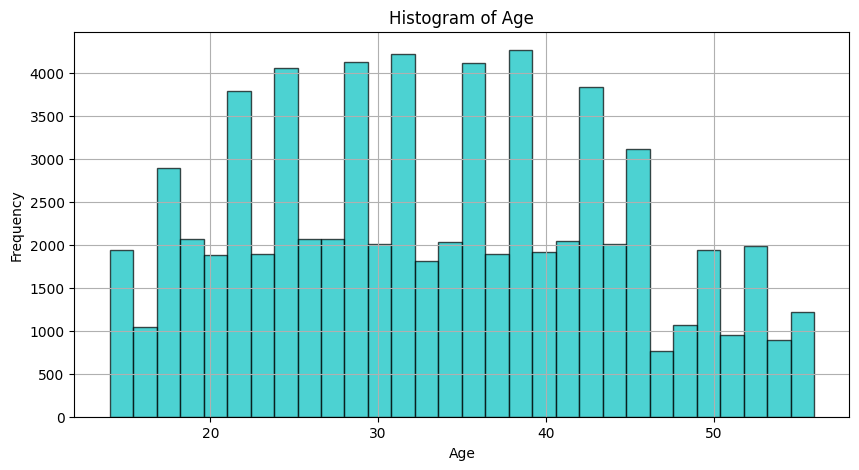

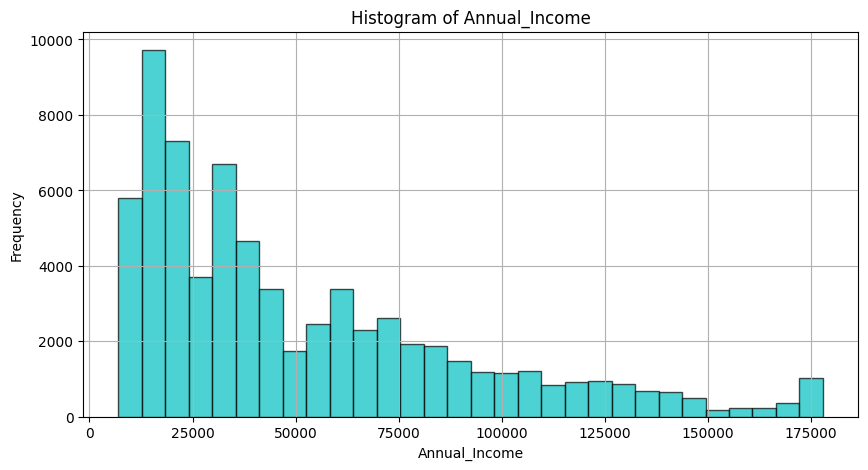

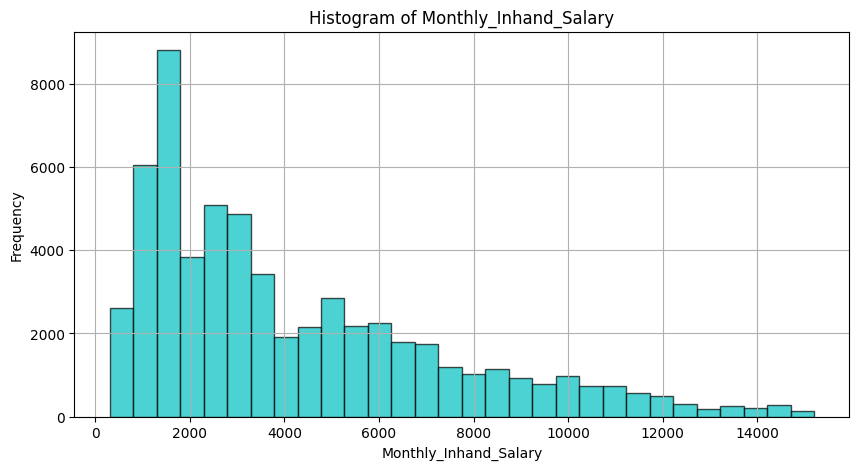

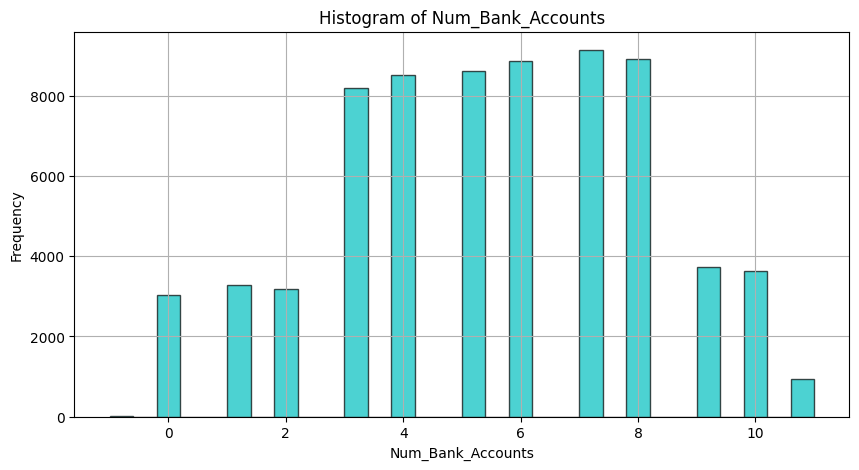

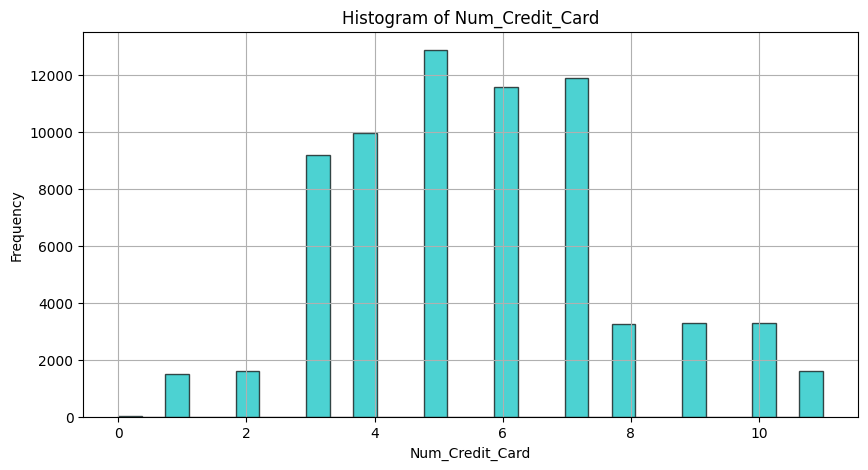

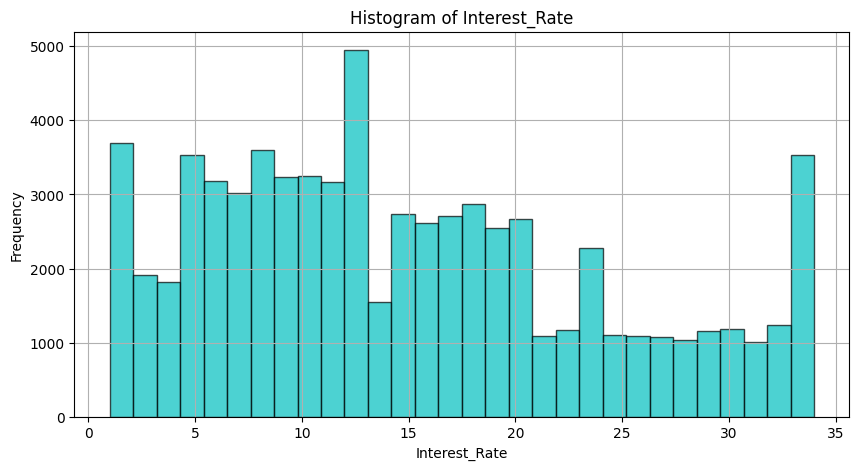

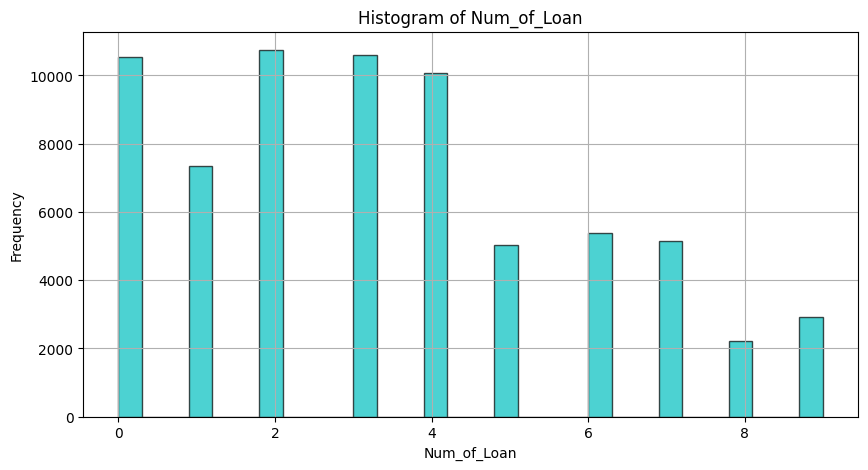

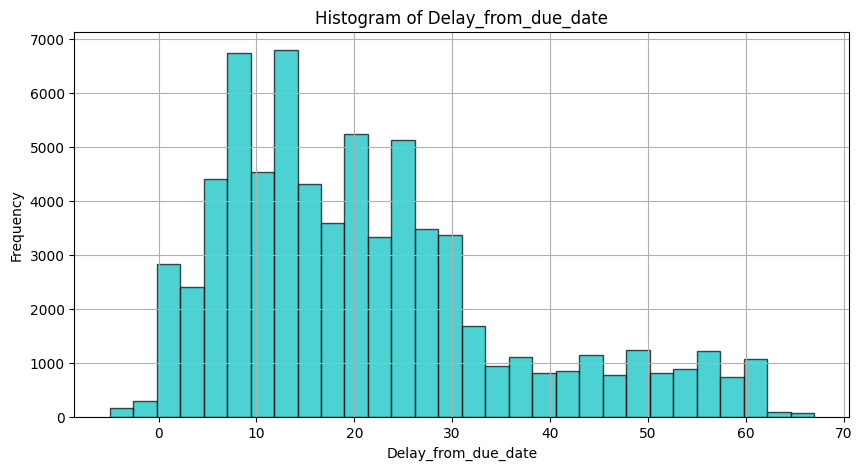

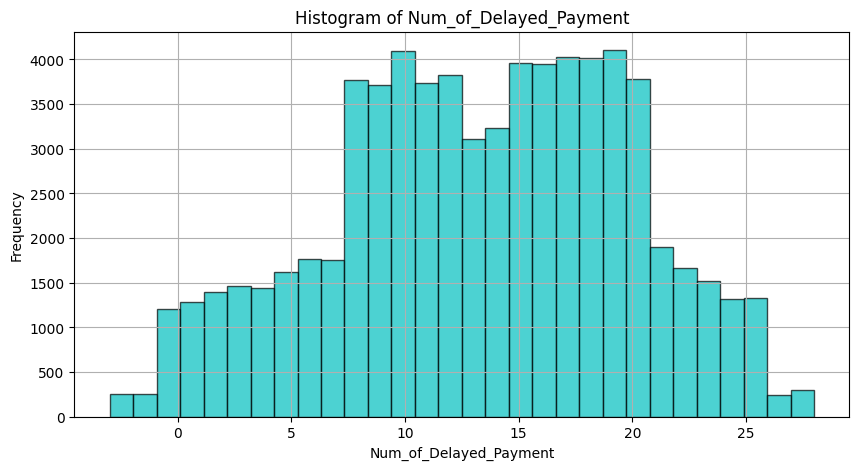

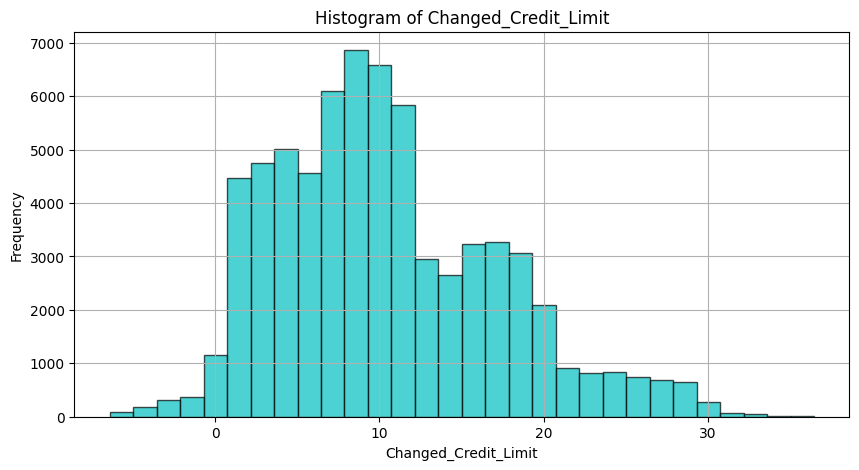

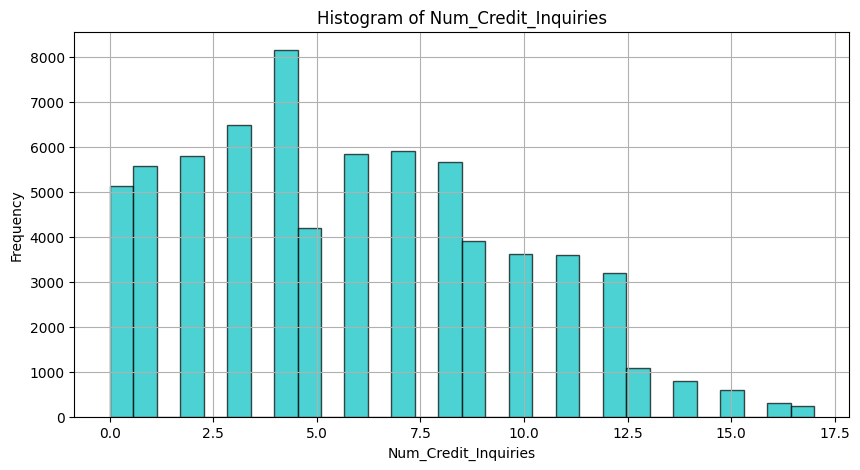

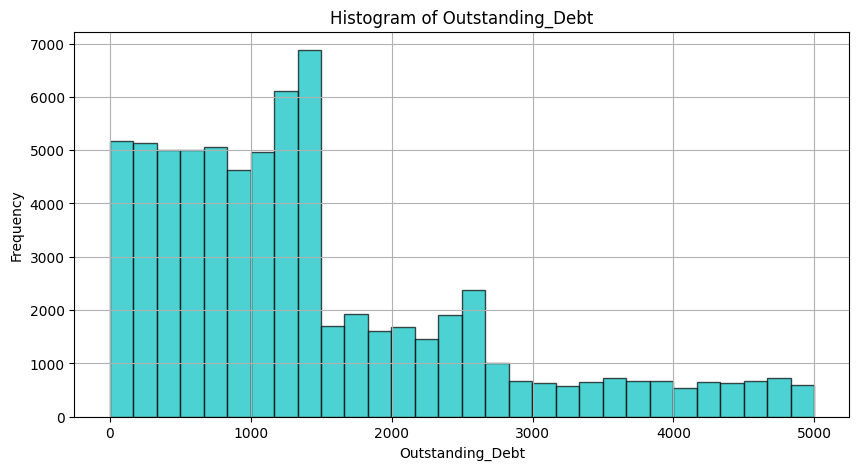

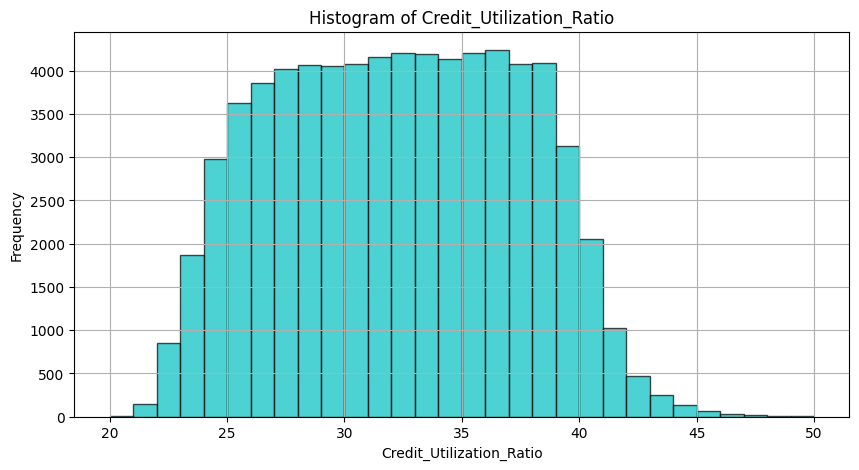

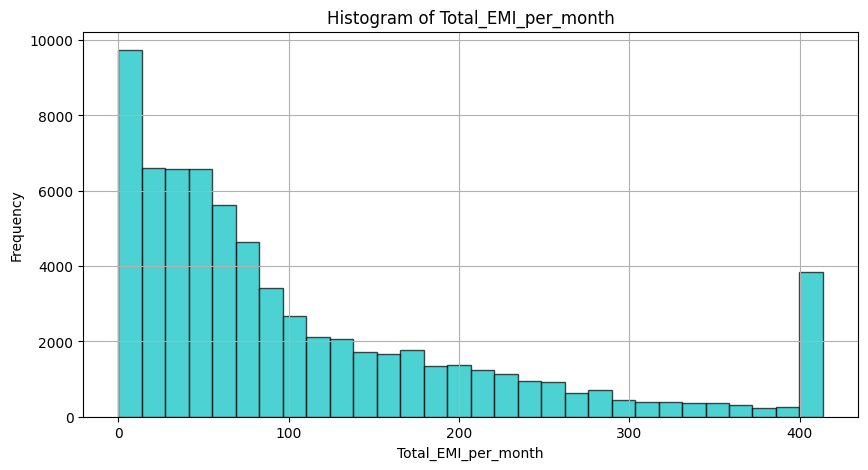

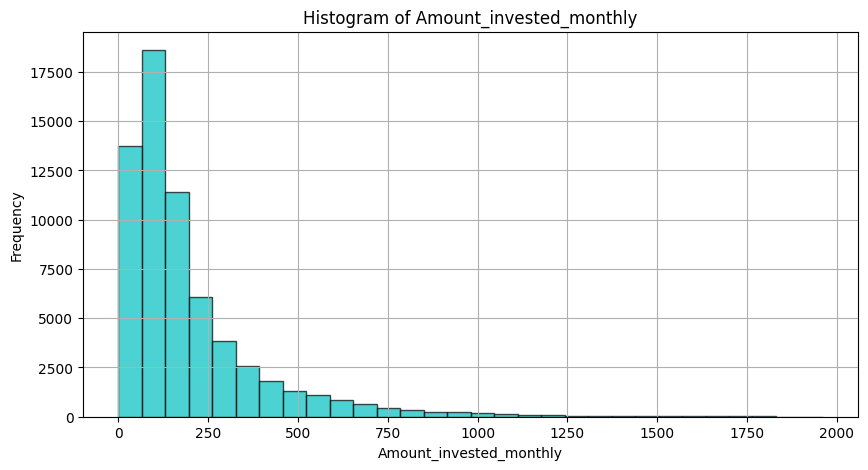

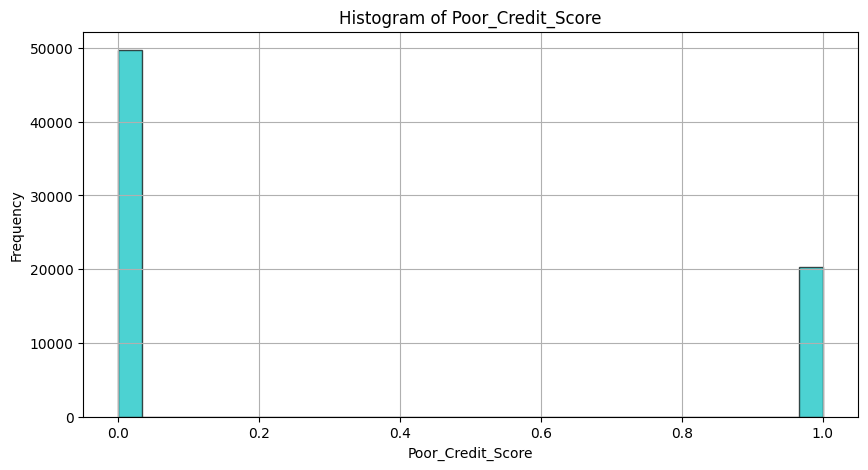

In [193]:
df_numeric = df.select_dtypes(include=[np.number])

for column in df_numeric.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df_numeric[column], bins=30, color='c', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Nanの補完

In [199]:
nan_columns = df.columns[df.isnull().any()]
print(nan_columns)


Index(['Name', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Changed_Credit_Limit', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')


In [201]:
for column in nan_columns:
    df[column] = df[column].fillna("hoge")


In [202]:
df.isnull().sum()

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Poor_Credit_Score           0
dtype: int64